Saving winequality-red.csv to winequality-red (2).csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


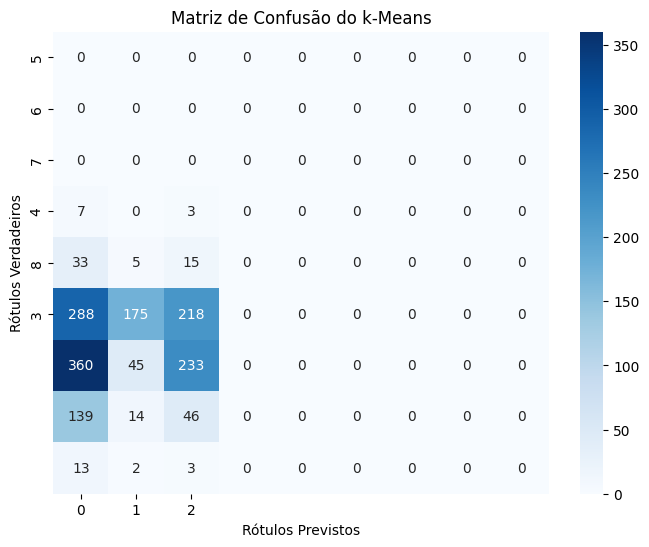

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import pandas as pd

# Carregar arquivo do PC
uploaded = files.upload()

# Obter o nome do arquivo carregado
nome_arquivo_local = list(uploaded.keys())[0]

# Carregar o conjunto de dados do arquivo local
data = pd.read_csv(nome_arquivo_local)

# Separar as features (X)
X = data.drop('quality', axis=1)  # 'quality' é a coluna que queremos clusterizar

# Aplicar o algoritmo k-Means
kmeans = KMeans(n_clusters=3, random_state=42)  # Definir o número de clusters
labels = kmeans.fit_predict(X)

# Adicionar os rótulos aos dados
data['cluster'] = labels

# Visualizar a matriz de confusão
conf_matrix = confusion_matrix(data['quality'], data['cluster'])

# Plotar a matriz de confusão usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=data['quality'].unique())
plt.title('Matriz de Confusão do k-Means')
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.show()
